# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

u'%.4f'

In [15]:
def line(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = line(a,b,x)

In [5]:
x

array([ 0.9102,  0.1681,  0.5909,  0.4624,  0.1789,  0.5594,  0.9827,  0.8323,  0.1618,  0.8139,
        0.8185,  0.6078,  0.7364,  0.8245,  0.7555,  0.4577,  0.6855,  0.1124,  0.6492,  0.9224,
        0.9673,  0.5096,  0.7889,  0.4333,  0.2006,  0.9938,  0.0446,  0.7723,  0.9891,  0.4382])

In [6]:
y

array([ 10.7306,   8.5042,   9.7726,   9.3871,   8.5367,   9.6783,  10.948 ,  10.4969,   8.4854,
        10.4418,  10.4554,   9.8234,  10.2091,  10.4735,  10.2666,   9.3732,  10.0566,   8.3371,
         9.9475,  10.7672,  10.902 ,   9.5288,  10.3668,   9.2999,   8.6018,  10.9814,   8.1337,
        10.317 ,  10.9674,   9.3145])

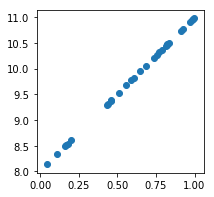

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, line(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [20]:
a_guess=100.
b_guess=250.
avg_loss(y, a_guess, b_guess, x)

302.6696

In [21]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [22]:
def upd():
    global a_guess, b_guess
    y_pred = line(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [16]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
lineplot, = plt.plot(x,line(a_guess,b_guess,x))
plt.close()

def animate(i):
    lineplot.set_ydata(line(a_guess,b_guess,x))
    for i in range(10): upd()
    return lineplot,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani